# **PRÁCTICA 12: K-Means Clustering con precios de vivienda en California**

En esta práctica se aplica el algoritmo K-Means para agrupar viviendas según su ubicación (latitud y longitud) y analizar cómo varía el precio medio en distintas regiones. El objetivo es observar patrones espaciales en los precios de vivienda mediante aprendizaje no supervisado.

## **Carga de datos y preparación**

Importamos librerías y cargamos el dataset:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# Cargar el dataset
california = pd.read_csv("housing.csv")

california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Visualización inicial de coordenadas y precios**


A continuación, se genera un gráfico de dispersión donde cada punto representa una vivienda, coloreado por su valor medio. Esto permite identificar visualmente zonas más caras o económicas en Californi.


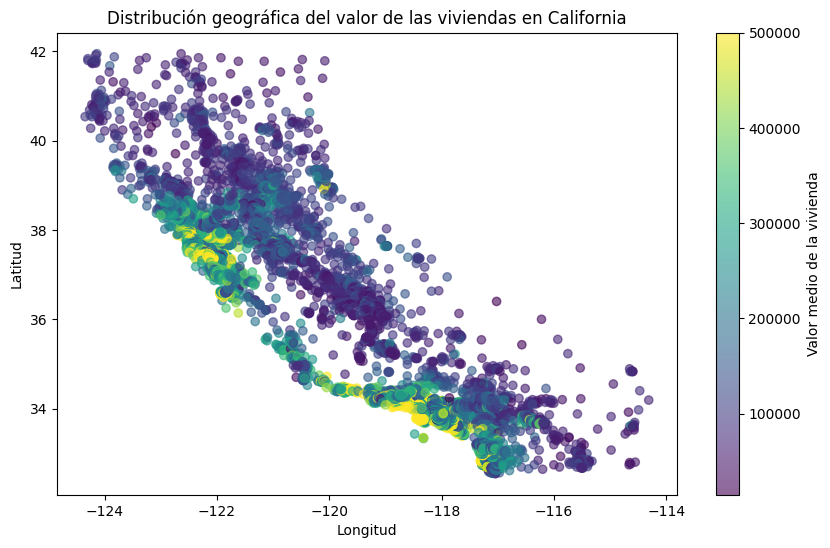

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(california['longitude'], california['latitude'], c=california['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Valor medio de la vivienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica del valor de las viviendas en California')
plt.show()

## **Normalización de la latitud y la longitud**

Para aplicar K-Means de forma efectiva, es necesario normalizar las variables, ya que el algoritmo utiliza distancias euclidianas. Aquí se estandarizan la latitud y longitud para que tengan igual peso.

In [10]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(california[['latitude', 'longitude']])

## **Entrenar el modelo K-Means con k=3**

Se entrena un primer modelo con `k=3` clústeres para observar cómo agrupa las viviendas. Más adelante, se ajustará este valor utilizando el método del codo.

Se ha elegido k=3 de forma inicial para que se pueda ver rápidamente cómo agrupa el algoritmo.

Pero más adelante se hace un analisis del mejor valor de k usando el método del codo, k=3 es solo un punto de partida.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
california['cluster'] = kmeans.fit_predict(coords_scaled)

## **Visualización de clústeres generados (k=3)**

Se grafican las ubicaciones con color según el clúster asignado. Esto permite ver cómo se distribuyen espacialmente los grupos identificados por el algoritmo.

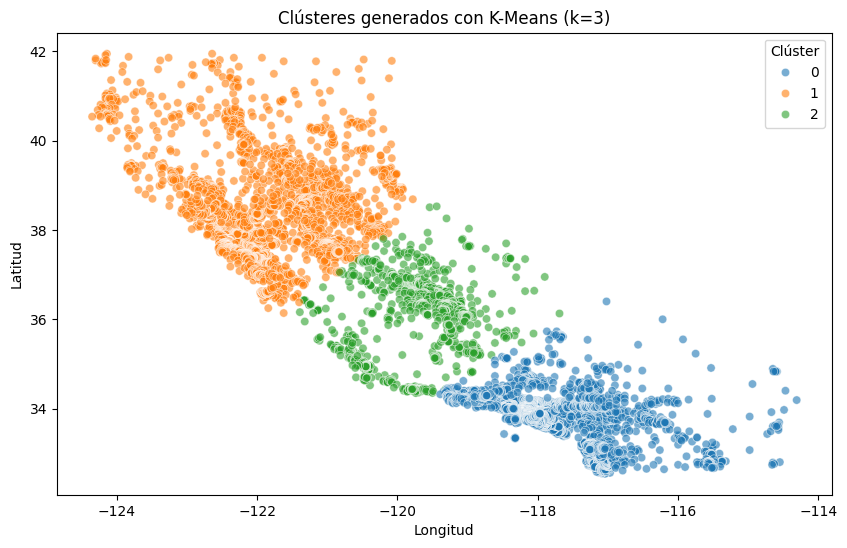

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=california, palette='tab10', alpha=0.6)
plt.title('Clústeres generados con K-Means (k=3)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Clúster')
plt.show()

## **Evaluación del modelo con puntuación de silueta**

La puntuación de silueta mide qué tan bien definido está cada clúster. Cuanto más alto (máximo 1), mejor separados están los grupos. Se calcula para k=3.

In [19]:
score = silhouette_score(coords_scaled, california['cluster'])
print("Puntuación de silueta (k=3):", score)

Puntuación de silueta (k=3): 0.6467062442107195


## **Método del codo para encontrar el k óptimo**

La inercia va a medir que tan compacto es cada clúster, que tan cerca están los puntos entre sí.

Se búsca un punto donde agregar más clústeres ya no reduce más la inercia y, ese el es "codo", o sea, el mejor númenro de grupos k.

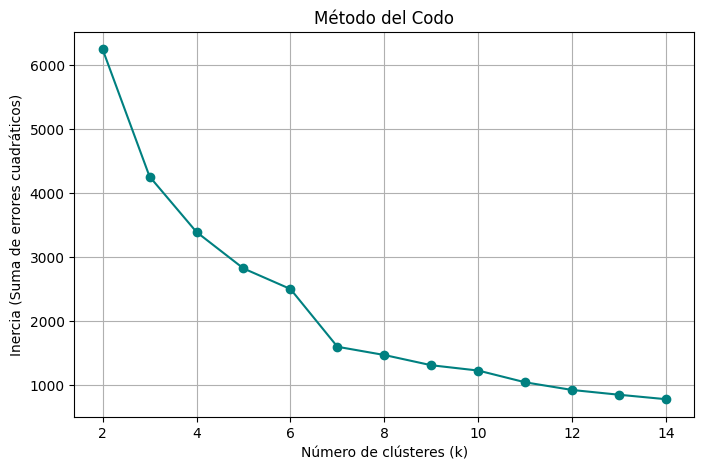

In [21]:
inertias = []
k_values = range(2, 15)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(coords_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'o-', color='teal')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (Suma de errores cuadráticos)')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

## Entrenamiento del modelo con k=7

Tras aplicar el método del codo, observamos que el valor óptimo para `k` es 7, ya que a partir de ese punto la mejora en la inercia comienza a ser menos significativa. Por lo tanto, volvemos a entrenar el modelo de K-Means con `k=7`.


In [23]:
# Reentrenar el modelo con k=7
kmeans = KMeans(n_clusters=7, random_state=42)
california['cluster'] = kmeans.fit_predict(coords_scaled)


In [24]:
score = silhouette_score(coords_scaled, california['cluster'])
print("Puntuación de silueta (k=7):", score)

Puntuación de silueta (k=7): 0.5724988534106065


## Añadir `median_income` como variable adicional

Se añade `median_income` a las variables utilizadas en la segmentación para ver si mejora la agrupación.


In [50]:
features = california[['latitude', 'longitude', 'median_income']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


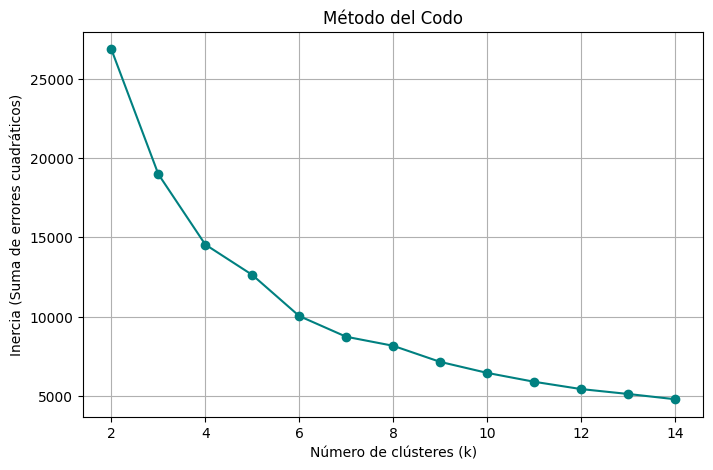

In [52]:
inertias = []
k_values = range(2, 15)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'o-', color='teal')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (Suma de errores cuadráticos)')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [54]:
# Reentrenar KMeans con las nuevas variables
kmeans = KMeans(n_clusters=7, random_state=42)
california['cluster'] = kmeans.fit_predict(features_scaled)


In [56]:
score = silhouette_score(features_scaled, california['cluster'])
print("Puntuación de silueta (k=7 y nuevas variables):", score)

Puntuación de silueta (k=7 y nuevas variables): 0.37225184832846725


## **Análisis final de distribución de precios por clúster (boxplot)**

Se utiliza un boxplot para observar cómo varía el valor medio de vivienda entre los clústeres. Esto permite identificar si los grupos reflejan diferencias reales de precio.

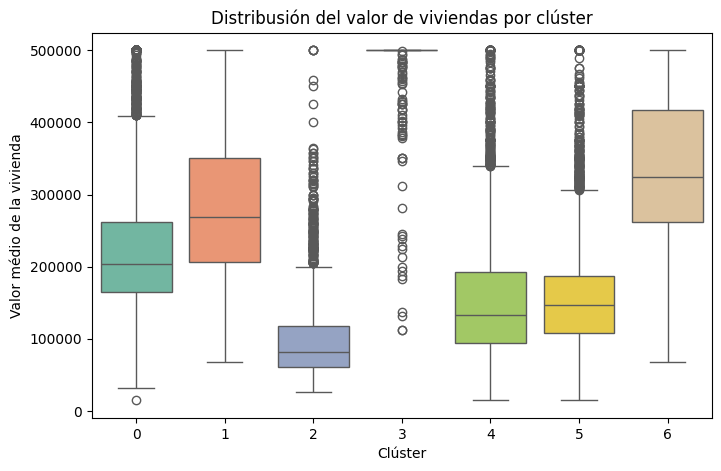

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='median_house_value', data=california, palette='Set2', hue='cluster', legend=False)
plt.title('Distribusión del valor de viviendas por clúster')
plt.xlabel('Clúster')
plt.ylabel('Valor médio de la vivienda')
plt.show()

## Resultados y Análisis del Modelo K-Means

### Tabla de puntuaciones de silueta

| Configuración                           | Silueta |
|----------------------------------------|---------|
| Sólo coordenadas (k=3)                 | 0.65    |
| Sólo coordenadas (k=7)                 | 0.57    |
| Coordenadas + median_income (k=7)      | 0.37    |

---

### Análisis

- **Configuración 1 (k=3, solo coordenadas)**  
  El modelo produce **clusters bien definidos** con una puntuación de silueta alta (0.65). Esto indica una buena compactación y separación entre los grupos, aunque la segmentación es más general.

- **Configuración 2 (k=7, solo coordenadas)**  
  El método del codo sugiere que **k=7 es el punto de inflexión** donde la ganancia de reducir la inercia empieza a ser marginal. Al aumentar los clusters, la silueta baja ligeramente (0.57), pero sigue siendo aceptable.

- **Configuración 3 (k=7, coordenadas + `median_income`)**  
  Al añadir una dimensión socioeconómica como el ingreso medio (`median_income`), se pierde algo de definición en los clusters (silueta = 0.37). Esto puede deberse a la mayor complejidad del espacio y a la menor correlación directa entre ingresos y ubicación geográfica.

---

### Conclusiones

- El **modelo con k=3** ofrece una **buena separación geográfica general**, ideal para visualizar las grandes regiones de precios distintos en California (por ejemplo, zonas urbanas costeras vs. interiores rurales).
  
- El **modelo con k=7**, recomendado por el método del codo, proporciona una **segmentación más detallada**, útil si se necesita un análisis más granular, aunque con menor compacidad en los grupos.

- Incluir variables socioeconómicas como `median_income` permite una **segmentación más rica** desde el punto de vista de negocio, pero con menor cohesión geométrica entre los puntos del mismo grupo.

- La elección final de **k y las variables** a incluir debe depender del objetivo del análisis:
  - Para análisis puramente **espaciales/geográficos**: usar solo latitud y longitud.
  - Para **análisis sociodemográficos o de marketing**: incluir `median_incoconsiderar variables como `median_income`.**
o 3‑D.
rficas.
